In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Redireccionar nuestra localización a donde està el archivo de irir
path = r"C:\Users\oswal\OneDrive\Documentos\GitHub\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
import seaborn as sns

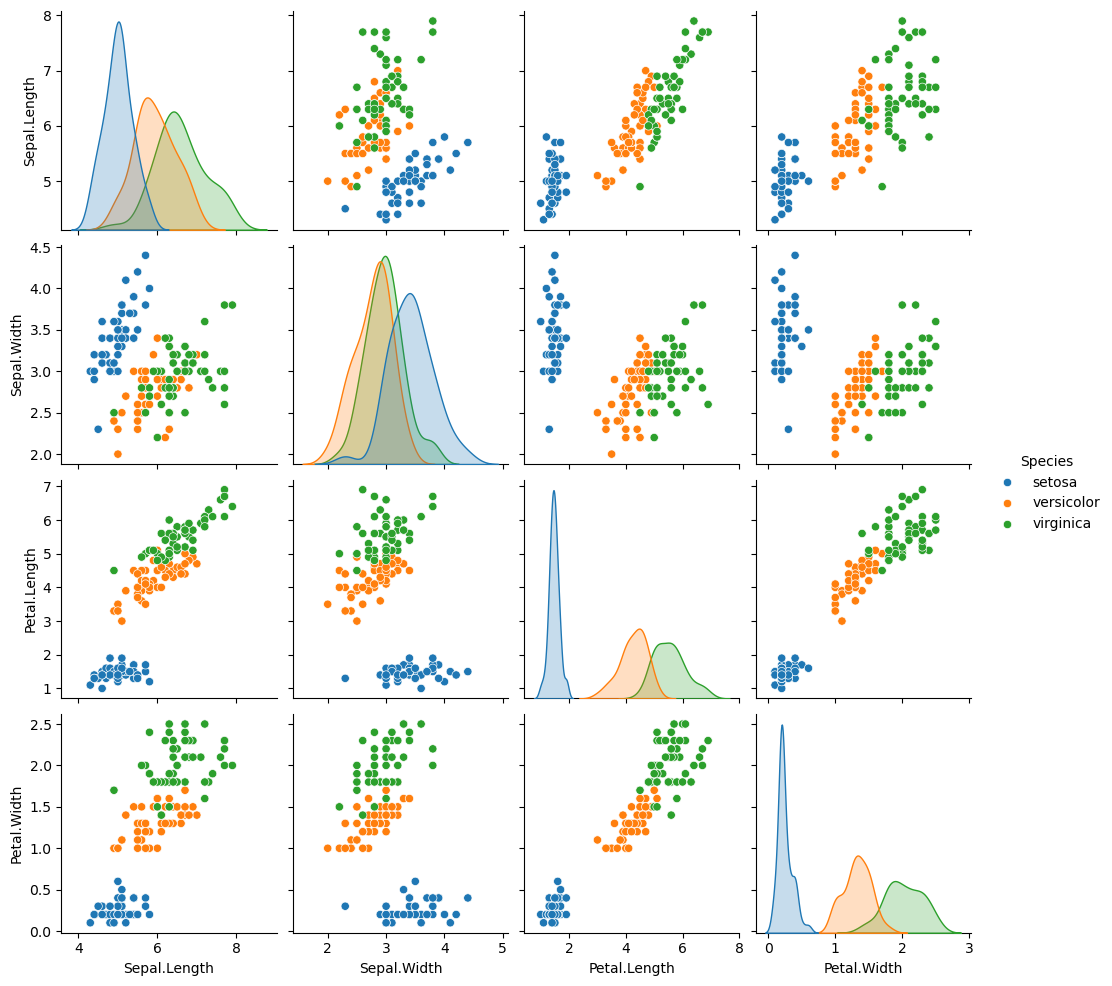

In [5]:
X = df.iloc[:, :4] #filtrar solo las 4 columnas numericas
sns.pairplot(df, hue="Species") #mostrar la correlacion entre las cuatro variables pero solo de 2 en 2, agregando hue agregamos color a
#cada grupo de datos, ya que al especificar que sea por especies le estamos diciendo que no son un solo conjunto sino que todos los
# que correspondan a la cantidad de grupos en Species

In [6]:
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
#Calcular los vectores y valores propios a partir de la matriz de covarianza (la diferencia entre la de 
#correlación es que no es estrictamente necesario que tengan la misma dimensión).
#Porcentaje de aporte de las variables y cuyantas ocupamos para representar el 85% de datos.

In [8]:
df['Species'].unique() #nos dice cuales elementos definen Species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
#Primero Normalizamos los datos de nuestros array
np.mean(X, axis=0), np.std(X, axis=0)

(Sepal.Length    5.843333
 Sepal.Width     3.057333
 Petal.Length    3.758000
 Petal.Width     1.199333
 dtype: float64,
 Sepal.Length    0.825301
 Sepal.Width     0.434411
 Petal.Length    1.759404
 Petal.Width     0.759693
 dtype: float64)

In [10]:
X_std = (X - np.mean(X, axis=0))/np.std(X, axis=0)
X_std

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [11]:
X_std.iloc[:, 0] #Index location siempre que trabajemos con un dataframe, o sea agarrate todos los indices 

0     -0.900681
1     -1.143017
2     -1.385353
3     -1.506521
4     -1.021849
         ...   
145    1.038005
146    0.553333
147    0.795669
148    0.432165
149    0.068662
Name: Sepal.Length, Length: 150, dtype: float64

In [12]:
X_std.describe() #Para corroborar la normalización

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-8.052818e-16,-2.842171e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


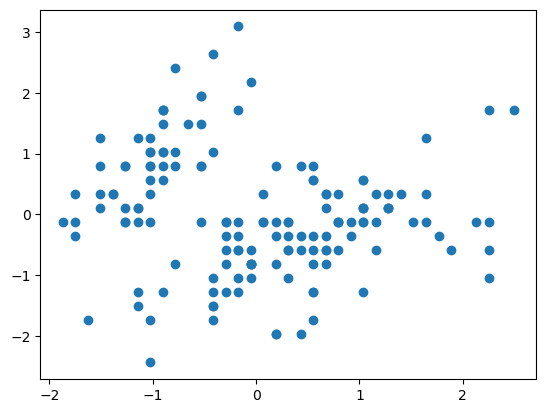

In [13]:
plt.scatter(X_std.iloc[:, 0], X_std.iloc[:, 1])

# Calculo de la Matriz covarianza

In [15]:
X_mean = np.mean(X_std, axis=0)
X_mean

Sepal.Length   -4.736952e-16
Sepal.Width    -8.052818e-16
Petal.Length   -2.842171e-16
Petal.Width    -4.736952e-16
dtype: float64

In [16]:
cov_matrix = (X_std - X_mean).T.dot((X_std - X_mean))/(X_std.shape[0]-1) #primer metodo para sacar matriz cov
cov_matrix

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.006711,-0.118359,0.877604,0.823431
Sepal.Width,-0.118359,1.006711,-0.431316,-0.368583
Petal.Length,0.877604,-0.431316,1.006711,0.969328
Petal.Width,0.823431,-0.368583,0.969328,1.006711


In [17]:
np.cov(X_std.T) #segundo metodo

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [18]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals, eig_vecs

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

# Calculo de valores y vectores propios con la matriz de correlación

In [20]:
#Manera corta de calcularlos (la del rpofe)
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [21]:
eig_vals, eig_vectors = np.linalg.eig(np.cov(X_std.T))
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [22]:
corr_matrix = np.corrcoef(X_std.T)
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [23]:
eig_vals_corr, eig_vecs_corr = np.linalg.eig(corr_matrix)
eig_vals_corr, eig_vecs_corr

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [24]:
#Manera rápida del profe para sacar el % de cada vector
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(2.9380850501999918,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624878,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449483,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462436,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [25]:
# Ordenamos de mayor a menor
eigen_pairs.sort(reverse=True)

# Calculamos los porcentajes
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [26]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp

El porcentaje de información que cada valor propio aporta es:


[72.96244541329983, 22.850761786701792, 3.6689218892828848, 0.5178709107154842]

In [27]:
print('El porcentaje de información acumulado es:')
cum_var_exp

El porcentaje de información acumulado es:


array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

# Singular Value Decomposition y sacar porcentajes

In [29]:
u, s, v = np.linalg.svd(X_std.T)
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [30]:
np.linalg.norm(eig_vecs[0]), np.linalg.norm(eig_vecs[0])

(0.9999999999999992, 0.9999999999999992)

In [31]:
np.sum(eig_vals)

4.02684563758389

In [32]:
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [33]:
#Sacar el porcentaje de cada uno de los vectores 
total_sum = np.sum(eig_vals)

val_porc_eig_val_1 = eig_vals[0]/total_sum * 100 #Los corchetes indican que estamos trabajando ahuevo con arreglos, el 0 es la posición 
val_porc_eig_val_2 = eig_vals[1]/total_sum * 100 #1 del array, nuestro array en este caso es eig_vals y [0] le estamos diciendo
val_porc_eig_val_3 = eig_vals[2]/total_sum * 100 #que tome el primer dato de ese array, y así susesivamente
val_porc_eig_val_4 = eig_vals[3]/total_sum * 100
val_porc_eig_val_1, val_porc_eig_val_2, val_porc_eig_val_3, val_porc_eig_val_4
#En este caso podemos ver que sólo los 2 primeros datos del array (valor propio 1 y 2) expresan el 94% de nuestros datos.


(72.96244541329983, 22.850761786701792, 3.6689218892828848, 0.5178709107154842)

In [34]:
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [35]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp

El porcentaje de información que cada valor propio aporta es:


[72.96244541329983, 22.850761786701792, 3.6689218892828848, 0.5178709107154842]

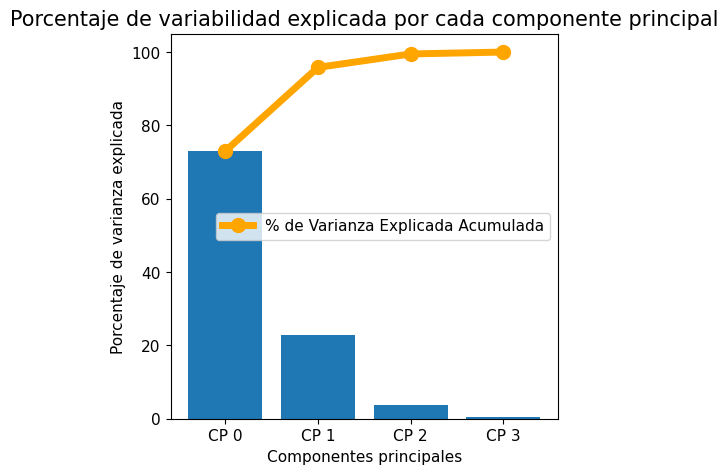

In [36]:
#PLOTS
#Las matrices se multiplican como lo hacen para mantener la transformación lineal
plt.figure(figsize=(5, 5))

x=["CP %s"%i for i in range(len(var_exp))]

plt.bar(x, var_exp)
plt.plot(x, cum_var_exp, '.-', label="% de Varianza Explicada Acumulada", c='orange', linewidth=5, markersize=20)

plt.xlabel("Componentes principales", fontsize=11)
plt.ylabel("Porcentaje de varianza explicada", fontsize=11)
plt.title("Porcentaje de variabilidad explicada por cada componente principal", fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(loc='best', fontsize=11)

#en este caso si nuestro espacio vectorial es de 4 dimensiones y sólo 2 vectores nos dan el 94% de la información, 
#podemos pasarlo a un espacio de solo esos 2 vectores (dimensiones), para hacer esa reduccion del espacio solo hayqq que multiplicar 
# nuestra matriz por la Tlineal.

In [37]:
#Quiero quedarme solo con los cada fila es un elemnto de mi ev que esta en 4 dimensiones
#Nuestra Tl la armamos con nuestros dos vectores principales


# Creando la matriz que representa la Tlineal

In [39]:
#Al transformar estamos proyectando en un espacio reducido, por lo que perse ya no estamos trabajando con los mismos datos
# o sea nos da los datos tomando en consideración 2 datos. Cuando reducimos de dimensión tendremos la información organizada. Es ver 
#la proyección con las sombras.

In [40]:
#Obtenemos el porcentaje de cada vector propio con el metodo de FOR que hizo el profe (ya lo hice atrás)
eigen_pairs

[(2.9380850501999918,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624878,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449483,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462436,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [41]:
eigen_pairs[0][1], eigen_pairs[1][1]

(array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))

In [42]:
T_matrix = np.stack((eigen_pairs[0][1], eigen_pairs[1][1]), axis=1)
T_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [43]:
espacio_proyectado = []

for idx in range(len(X)):
    vec = X.iloc[idx, :] # vector en R4
    Tvec = T_matrix.T.dot(vec) # proyección del espacio de 4D a 2D
    espacio_proyectado.append(Tvec)

In [44]:
# Convertimos la lista en array
espacio_proyectado_np = np.array(espacio_proyectado)

In [45]:
espacio_proyectado_np

array([[ 2.64026976, -5.2040413 ],
       [ 2.6707303 , -4.66690995],
       [ 2.45460631, -4.77363639],
       [ 2.54551709, -4.64846339],
       [ 2.56122842, -5.2586291 ],
       [ 2.97594579, -5.70732073],
       [ 2.4631572 , -4.92969712],
       [ 2.67313922, -5.07641913],
       [ 2.43713208, -4.38587157],
       [ 2.64535121, -4.75499447],
       [ 2.80076135, -5.50437488],
       [ 2.62696735, -5.00338477],
       [ 2.56213805, -4.62247398],
       [ 2.12748116, -4.42641769],
       [ 2.75425956, -5.92498314],
       [ 2.88150922, -6.27729552],
       [ 2.74378055, -5.69752408],
       [ 2.69675541, -5.2107355 ],
       [ 3.10271466, -5.72152225],
       [ 2.67399249, -5.49017336],
       [ 2.9976482 , -5.2322845 ],
       [ 2.75741289, -5.40453799],
       [ 2.12063682, -5.09786541],
       [ 3.03772014, -5.04681224],
       [ 2.80109128, -5.01073225],
       [ 2.83891951, -4.70955003],
       [ 2.84415184, -5.09225669],
       [ 2.75041766, -5.24423222],
       [ 2.71931109,

In [46]:
Y = X.dot(T_matrix)
Y

,0,1
0,2.640270,-5.204041
1,2.670730,-4.666910
2,2.454606,-4.773636
3,2.545517,-4.648463
4,2.561228,-5.258629
...,...,...
145,7.000417,-5.579908
146,6.584640,-4.935618
147,6.726747,-5.484342
148,6.748228,-5.765416


In [47]:
espacio_proyectado_np.shape

(150, 2)

In [53]:
df_proyectado = pd.DataFrame({'CP1': espacio_proyectado_np[:, 0], 
                              'CP2': espacio_proyectado_np[:, 1], 
                              'Species': df['Species']})

<Axes: xlabel='CP1', ylabel='CP2'>

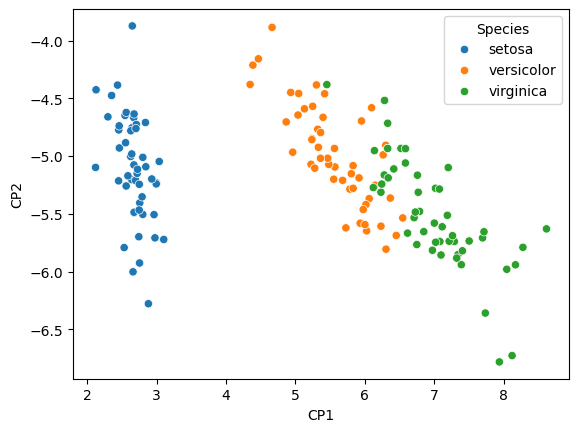

In [62]:
sns.scatterplot(data=df_proyectado, x='CP1', y='CP2', hue='Species')

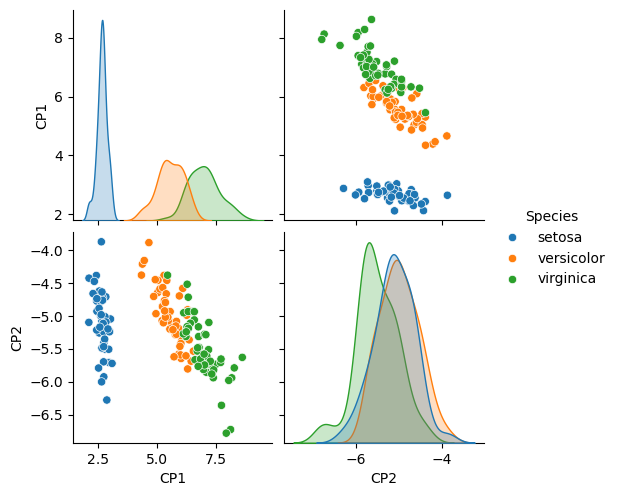

In [96]:
sns.pairplot(df_proyectado, hue="Species")